<a href="https://colab.research.google.com/github/Danis2019/Coursework2/blob/main/Coursework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%writefile main.cpp

#include <list>
#include <iostream>
#include <vector>
#include <algorithm>
#include <fstream> 

void Left_Edge_Alghoritm(int** Graph, int* Contacts, int** Magistrales, int size_contacts,int number_iteration)
{
    std ::vector<int> Left_Edge;
    // Распределим контакты начиная с левого верхнего края канала
    for (int i = 0; i < size_contacts; i++)
        Left_Edge.push_back(Contacts[i]);
    std::sort(Left_Edge.begin(), Left_Edge.end());
    if (number_iteration == 1)//Для простого Left_Edge алгоритма
    {
        std::vector<int> Left_Edge2;
        for (int i = 0; i < size_contacts; i++)
        {
            int j = 0;
            while (j < Left_Edge2.size())
            {
                if (Contacts[i] == Left_Edge2[j])
                    break;
                j++;
            }
            if (j == Left_Edge2.size())
                Left_Edge2.push_back(Contacts[i]);
        }
        Left_Edge = Left_Edge2;
    }
    else //Для доглега
    {

        std::vector<int> Left_Edge2, Left_Edge3;
        for (int i = 0; i < size_contacts; i++)
        {
            int j = 0;
            while (j < Left_Edge2.size())
            {
                if (Contacts[i] == Left_Edge2[j])
                    break;
                j++;
            }
            if (j == Left_Edge2.size())
                Left_Edge2.push_back(Contacts[i]);
        }

        int max = Left_Edge[Left_Edge.size() - 1] + 1;
        int lenght = Left_Edge.size() - 1;
        int i = lenght;
        while (i > 0)
        {
            if (Left_Edge[i] < max)
            {
                max = Left_Edge[i];
                Left_Edge.erase(Left_Edge.begin() + i);
                i--;

            }
            i--;

        }
        for (int i = 0; i < Left_Edge2.size(); i++)
        {
            int count = 0;
            for (int j = 0; j < Left_Edge.size(); j++)
            {
                if (Left_Edge2[i] == Left_Edge[j])
                    count += 1;
            }
            for (int k = 0; k < count; k++)
                Left_Edge3.push_back(Left_Edge2[i]);

        }

        Left_Edge = Left_Edge3;
        for (int i = 0; i < Left_Edge.size() - 1; i++)
            if (Left_Edge[i] == Left_Edge[i + 1])
            {
                int tmp = Left_Edge[i + 1];
                Left_Edge[i + 1] = Left_Edge[i + 2];
                Left_Edge[i + 2] = tmp;
            }
    }
    //Контакт со значением 0 нам не нужен    
    for (int i = 0; i < Left_Edge.size(); i++)
        if (Left_Edge[i] == 0)
        {
            Left_Edge.erase(Left_Edge.begin() + i);
            i--;
        }
    std::cout << "Left edge order:" << std::endl;
    for (int i = 0; i < Left_Edge.size(); i++) {
        std::cout << Left_Edge[i] << " ";
    }
    std::cout << "\n";
    // Заменим ГВО, если это алгоритм доглега
    if (number_iteration != 1)
    {
        int n = Left_Edge.size();

    }
    int index = -1;
    int size = Left_Edge.size();
    std::ofstream out;          // поток для записи
    out.open("result.txt"); // окрываем файл для записи
    while (index < size - 1)
    {
        // проверка ГВО
        index += 1;
        bool Before_vertex = false;
        int Current = Left_Edge[0];
        for (int j = index; j < index + 1; j++)
            if (Graph[index][j] != 0)
                Before_vertex = true;

        if (Before_vertex == true)
        {
            std::cout << "Next" << std::endl;
            continue;
        }
        std::cout << "Current:" << Current << std::endl;
        //находим индексы крайнего левого и крайнего правого контактов
        int index_left;
        int index_right;
        int Left_Down;
        int Right_Down;
        int start; // для поиска второго контакта
        for (int i = 0; i < size_contacts; i++)
        {
            if (Current == Contacts[i])
            {
                Contacts[i] = 0;
                if (i % 2 == 0)
                    Left_Down = -1;
                else
                    Left_Down = 1;
                index_left = i / 2;
                break;
            }
        }
        if (number_iteration == 2)
            for (int i = index_left * 2 + 2; i < size_contacts; i++) // index_left + 2 потому что контакты минимум на 1 ячейке
                if (Current == Contacts[i])
                {
                    if (i % 2 == 0)
                        Right_Down = -1;
                    else
                        Right_Down = 1;
                    index_right = i / 2;
                    break;
                }
        if (number_iteration == 1)
        {
            for (int i = size_contacts; i > 0; i--)
                if (Current == Contacts[i])
                {
                    if (i % 2 == 0)
                        Right_Down = -1;
                    else
                        Right_Down = 1;
                    index_right = i / 2;
                    break;
                }
        }

        std::cout << "index_left " << index_left << " index_right " << index_right << std::endl;
        std::cout << "Left_Down  " << Left_Down << " Right_Down  " << Right_Down << std::endl;
        //Find number magisral!!!

        int number_magistral = -1;
        for (int i = 0; i < size_contacts / 2; i++)
        {
            bool Free_Place = true;
            // Проверка, что магистраль свободна
            for (int j = index_left; j < index_right + 1; j++)
                if (Magistrales[i][j] != 0)
                {
                    Free_Place = false;
                    break;
                }
            // проверка вертикальных участков
                //справа
            for (int k = i + Right_Down; k > -1 && k < size_contacts / 2; k = k + Right_Down)
            {
                if (Magistrales[k][index_right] != 0)
                {
                    if (index_right == size_contacts / 2 - 1)
                    {
                        Free_Place = false;
                        break;
                    }
                    else if (Magistrales[k][index_right + 1] == 0)
                    {
                        Free_Place = false;
                        break;
                    }
                }
            }
            //слева
            for (int k = i + Left_Down; k > -1 && k < size_contacts / 2; k = k + Left_Down)
            {
                if (Magistrales[k][index_left] != 0)
                {
                    if (index_left == 0)
                    {
                        Free_Place = false;
                        break;
                    }
                    else if (Magistrales[k][index_left - 1] == 0)
                    {
                        Free_Place = false;
                        break;
                    }
                }
            }
            if (Free_Place == true)
            {

                number_magistral = i;
                break;
            }

        }
        if (number_magistral == -1)
        {
            std::cout << "Can^t find magistral to contact: " << Current << std::endl;
            continue;
        }
        // Рисуем найденную магистраль
        for (int j = index_left; j < index_right + 1; j++)
            Magistrales[number_magistral][j] = Current;

        for (int i = 0; i < size_contacts / 2; i++)
        {
            for (int j = 0; j < size_contacts / 2; j++)
                std::cout << Magistrales[i][j] << "\t";
            std::cout << "\n";
        }

        if (out.is_open())
        {
            out << number_magistral << " " << index_left << " " << index_right << " " << Left_Down << " " << Right_Down;
            out << "\n";
        }
        std::cout << "Numb magistral: " << number_magistral << std::endl;

        Left_Edge.erase(Left_Edge.begin() + index);
        size = Left_Edge.size();
        index = -1;

    }
}

int main()
{
    std::ifstream gvo;
    gvo.open("GVO.txt");
    int n;
    gvo >> n;
    int** graph = new int* [n];
    for (int i = 0; i < n; i++)
        graph[i] = new int[n];
    for (int i = 0; i < n; i++)
        for (int j = 0; j < n; j++)
            gvo >> graph[i][j];
    std::cout << "Graph:" << std::endl;
    for (int i = 0; i < n; i++)
    {
        for (int j = 0; j < n; j++)
            std::cout << graph[i][j] << " ";
        std::cout << "\n";
    }
    // Ввод контактов из файла input.txt
    std::ifstream size;
    size.open("size_contacts.txt");
    int size_contacts;
    if (size.is_open())
    {
        size >> size_contacts;
    }
    std::cout << "contacts:";
    std::ifstream file;
    file.open("input.txt");

    int* contacts = new int[size_contacts];
    if (file.is_open())
    {
        for (int i = 0; i < size_contacts; i++)
            file >> contacts[i];
    }
    for (int i = 0; i < size_contacts; i++)
        std::cout << contacts[i];
    std::cout << "\n";
    //Заполнение магистралей
    int** magistrales = new int* [size_contacts / 2];
    for (int i = 0; i < size_contacts / 2; i++)
        magistrales[i] = new int[size_contacts / 2];
    for (int i = 0; i < size_contacts / 2; i++)
        for (int j = 0; j < size_contacts / 2; j++)
            magistrales[i][j] = 0;
    int number_iteration = 2;
    Left_Edge_Alghoritm(graph, contacts, magistrales, size_contacts, number_iteration);

    // Первая часть закончена
    /*
    int** magistrales2 = new int* [size_contacts / 2];
    for (int i = 0; i < size_contacts / 2; i++)
        magistrales2[i] = new int[size_contacts / 2];
    for (int i = 0; i < size_contacts / 2; i++)
        for (int j = 0; j < size_contacts / 2; j++)
            magistrales2[i][j] = 0;
    const unsigned int DIM3 = 6;
    const unsigned int DIM4 = 6;

    int graph_test2[DIM3][DIM4] = {
        { 0, 1, 1, 0, 0, 0},
        { 0, 0, 0, 1, 0, 0},
        { 0, 0, 0, 0, 1, 0},
        { 0, 0, 0, 0, 0, 1},
        { 0, 0, 0, 0, 0, 1},
        { 0, 0, 0, 0, 0, 0}
    };
    int n2 = 6;
    int** graph2 = new int* [n2];
    for (int i = 0; i < 6; i++)
        graph2[i] = new int[n2];
    for (int i = 0; i < 6; i++)
        for (int j = 0; j < 6; j++)
            graph2[i][j] = graph_test2[i][j];
    Left_Edge_Alghoritm(graph2, contakts, magistrales2, size_contacts);*/
    // Вывод данных в файл


    /*if (out.is_open())
    {
      for (int i = 0; i < size_contacts / 2; i++)
      {
          for (int j = 0; j < size_contacts / 2; j++)
              out << magistrales[i][j] << " ";
          out << "\n";
      }
    }*/
    int exit;
    std::cin >> exit;
}

Overwriting main.cpp


In [ ]:
%%script bash

g++ main.cpp -std=c++11
./a.out

Graph:
0 1 1 0 
0 0 0 1 
0 0 0 1 
0 0 0 0 
contacts:121320032434
Left edge order:
1 2 3 2 3 4 
Current:1
index_left 0 index_right 1
Left_Down  -1 Right_Down  -1
1	1	0	0	0	0	
0	0	0	0	0	0	
0	0	0	0	0	0	
0	0	0	0	0	0	
0	0	0	0	0	0	
0	0	0	0	0	0	
Numb magistral: 0
Current:2
index_left 0 index_right 2
Left_Down  1 Right_Down  -1
1	1	0	0	0	0	
2	2	2	0	0	0	
0	0	0	0	0	0	
0	0	0	0	0	0	
0	0	0	0	0	0	
0	0	0	0	0	0	
Numb magistral: 1
Current:3
index_left 1 index_right 3
Left_Down  1 Right_Down  1
1	1	0	0	0	0	
2	2	2	0	0	0	
0	3	3	3	0	0	
0	0	0	0	0	0	
0	0	0	0	0	0	
0	0	0	0	0	0	
Numb magistral: 2
Current:2
index_left 2 index_right 4
Left_Down  -1 Right_Down  -1
1	1	2	2	2	0	
2	2	2	0	0	0	
0	3	3	3	0	0	
0	0	0	0	0	0	
0	0	0	0	0	0	
0	0	0	0	0	0	
Numb magistral: 0
Current:3
index_left 3 index_right 5
Left_Down  1 Right_Down  -1
1	1	2	2	2	0	
2	2	2	3	3	3	
0	3	3	3	0	0	
0	0	0	0	0	0	
0	0	0	0	0	0	
0	0	0	0	0	0	
Numb magistral: 1
Current:4
index_left 4 index_right 5
Left_Down  1 Right_Down  1
1	1	2	2	2	0	
2	2	2	3	3	3	
0	3	3	3	4

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
data = pd.read_table('result.txt' ,sep='\s+', engine='python', header=None)
inputs = pd.read_table('input.txt' ,sep='\s+', engine='python', header=None)

In [ ]:
data

,0,1,2,3,4
0,0,0,1,-1,-1
1,1,0,2,1,-1
2,2,1,3,1,1
3,0,2,4,-1,-1
4,1,3,5,1,-1
5,2,4,5,1,1


In [ ]:
up_contacts = list(
    inputs[
       inputs.columns[inputs.columns % 2 == 0]
       ].iloc[0])
down_contacts = list(
    inputs[
       inputs.columns[inputs.columns % 2 == 1]
       ].iloc[0])

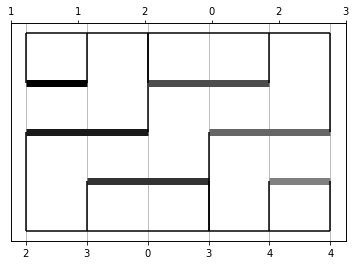

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
for i in range(len(data[0])):
    numb_magistrales = data.iloc[i][0]
    numb_magistrales = max(data[0]) - numb_magistrales + 1
    index_left = data.iloc[i][1]
    index_right = data.iloc[i][2]
    left_down = data.iloc[i][3]
    right_down = data.iloc[i][4]

    ax1.hlines(numb_magistrales, 
               index_left, index_right, color = str(i / 10), linewidth = 7)

    if left_down == 1:
      ax1.vlines(index_left, 0, numb_magistrales)
    else:
      ax1.vlines(index_left, numb_magistrales, max(data[0]) + 2)

    if right_down == 1:
      ax1.vlines(index_right, 0,numb_magistrales)
    else:
      ax1.vlines(index_right, numb_magistrales, max(data[0]) + 2)

ax1.hlines(0, 0, index_right)
ax1.hlines(max(data[0]) + 2, 0, index_right)
plt.setp(ax2, xticks= list(range(len(up_contacts))), xticklabels= up_contacts )
plt.setp(ax1, xticks= list(range(len(down_contacts))), xticklabels= down_contacts, yticks=[])
ax1.grid()
      

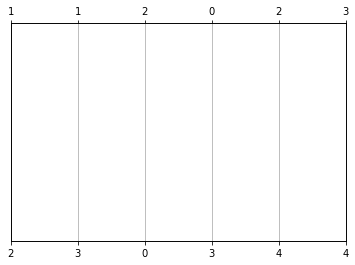

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
plt.setp(ax2, xticks= list(range(len(up_contacts))), xticklabels= up_contacts )
plt.setp(ax1, xticks= list(range(len(down_contacts))), xticklabels= down_contacts, yticks=[])
ax1.grid()